In [2]:
#Install Yahoo Finance API
pip install yahoo_fin

     |████████████████████████████████| 81 kB 5.1 MB/s 
     |████████████████████████████████| 83 kB 2.7 MB/s 
     |████████████████████████████████| 103 kB 39.2 MB/s 
     |████████████████████████████████| 127 kB 48.0 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=8c4eb495244b94f4d4254cf0cd4eb0f040355d9bda3ae9eb8a78dd73c4369f5f
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=c8578f870ddef4100a5075ffe09c37bb989d55787a337daf595f37c853689df9
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6065 sha256=a70dacb10a13054fe9c37b1c2b315541ded4c77e5c2bf14d71788462c04f36ab
  Stored in directory: /root/.cache/pip/wheels/73/ad/a4/0dff4a6ef231fc0dfa12ffbac2a36ce

In [3]:
#Import necessary Libraries
from google.colab import files
import io
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import statsmodels.formula.api as smf
from yahoo_fin.stock_info import get_data


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
#Upload Data Master.xlsx to colab
uploaded_master = files.upload()

Saving DATA MASTER.xlsx to DATA MASTER.xlsx


In [5]:
#Extracting data from API and align it with relevant
aapl = get_data("aapl", start_date="01/04/2003", end_date="01/07/2021", index_as_date = True, interval="1mo")
djia = get_data("^dji", start_date="01/04/2003", end_date="01/07/2021", index_as_date = True, interval="1mo")
djia_quart = djia['close'][2::3].reset_index().drop(columns=["index"])
aapl_quart = aapl['close'][2::3].reset_index().drop(columns=["index"])

In [6]:
#Group and clean the gathered data 
data_master = pd.read_excel(io.BytesIO(uploaded_master['DATA MASTER.xlsx']))
data_master['AAPL'],data_master['DJIA'] = aapl_quart, djia_quart 
drop_final = data_master.dropna()
drop_final

,Date,GDP,T5YIFR,POPTHM,UNRATE,AAPL,DJIA
0,2003-04-01,11312.766,1.944127,290252.666667,6.133333,1.015714,8480.089844
1,2003-07-01,11566.669,2.268125,290974.000000,6.133333,1.505714,9233.799805
2,2003-10-01,11772.234,2.537419,291669.333333,5.833333,1.635000,9801.120117
3,2004-01-01,11923.447,2.458548,292236.666667,5.700000,1.611428,10488.070312
4,2004-04-01,12112.815,2.634194,292875.333333,5.600000,1.841428,10225.570312
...,...,...,...,...,...,...,...
67,2020-01-01,21481.367,1.572903,329529.333333,3.800000,309.510010,28256.029297
68,2020-04-01,19477.444,1.483175,329897.333333,13.066667,73.449997,24345.720703
69,2020-07-01,21138.574,1.715469,330367.333333,8.800000,106.260002,26428.320312
70,2020-10-01,21477.597,1.874516,330815.000000,6.766667,108.860001,26501.599609


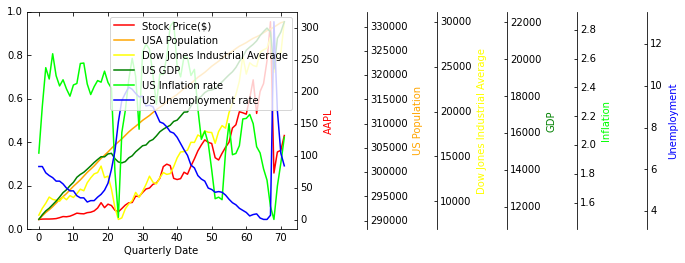

In [7]:
#Line Graph
host = host_subplot(111,axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)
par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()
par4 = host.twinx()
par5 = host.twinx()
par6 = host.twinx()

new_fixed_axis = par6.get_grid_helper().new_fixed_axis
par6.axis["right"] = new_fixed_axis(loc="right", axes=par6, offset=(70*5, 0))
par6.axis["right"].toggle(all=True)
new_fixed_axis = par5.get_grid_helper().new_fixed_axis
par5.axis["right"] = new_fixed_axis(loc="right", axes=par5, offset=(70*4, 0))
par5.axis["right"].toggle(all=True)
new_fixed_axis = par4.get_grid_helper().new_fixed_axis
par4.axis["right"] = new_fixed_axis(loc="right", axes=par4, offset=(70*3, 0))
par4.axis["right"].toggle(all=True)
new_fixed_axis = par3.get_grid_helper().new_fixed_axis
par3.axis["right"] = new_fixed_axis(loc="right", axes=par3, offset=(70*2, 0))
par3.axis["right"].toggle(all=True)
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right", axes=par2, offset=(70*1, 0))
par2.axis["right"].toggle(all=True)
new_fixed_axis = par1.get_grid_helper().new_fixed_axis
par1.axis["right"] = new_fixed_axis(loc="right", axes=par1, offset=(0, 0))
par1.axis["right"].toggle(all=True)

host.set_xlabel("Quarterly Date")
par1.set_ylabel("AAPL")
par2.set_ylabel("US Population")
par3.set_ylabel("Dow Jones Industrial Average")
par4.set_ylabel("GDP")
par5.set_ylabel("Inflation")
par6.set_ylabel("Unemployment")

p1, = par1.plot(drop_final["AAPL"], color='red', label="Stock Price($)")
p2, = par2.plot(drop_final["POPTHM"], color='orange', label="USA Population")
p3, = par3.plot(drop_final["DJIA"], color='yellow', label="Dow Jones Industrial Average")
p4, = par4.plot(drop_final["GDP"], color='green', label="US GDP")
p5, = par5.plot(drop_final["T5YIFR"], color='lime', label="US Inflation rate")
p6, = par6.plot(drop_final["UNRATE"], color='blue', label="US Unemployment rate")


host.legend()


par1.axis["right"].label.set_color(p1.get_color())
par2.axis["right"].label.set_color(p2.get_color())
par3.axis["right"].label.set_color(p3.get_color())
par4.axis["right"].label.set_color(p4.get_color())
par5.axis["right"].label.set_color(p5.get_color())
par6.axis["right"].label.set_color(p6.get_color())

plt.draw()
plt.show()

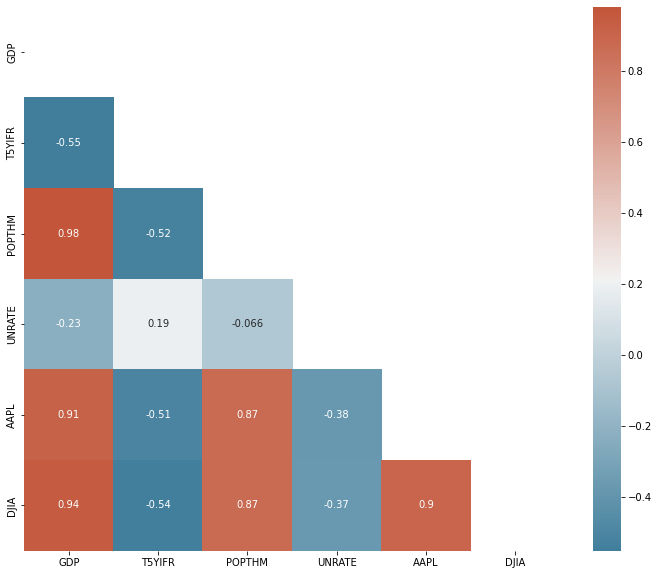

In [8]:
# corr
corr = drop_final.corr()
f, ax = plt.subplots(figsize=(12,10))
mask = np.triu(np.ones_like(corr,dtype=bool))
cmap = sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask,cmap=cmap)


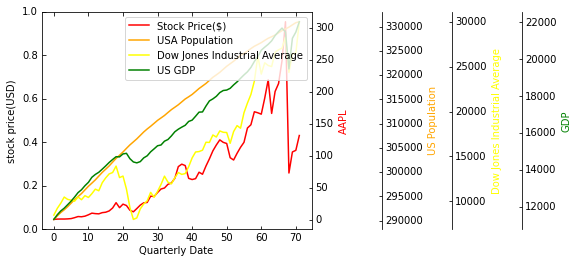

In [9]:
#Plot Line Graph with relevant values
host = host_subplot(111,axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)
par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()
par4 = host.twinx()


new_fixed_axis = par4.get_grid_helper().new_fixed_axis
par4.axis["right"] = new_fixed_axis(loc="right", axes=par4, offset=(70*3, 0))
par4.axis["right"].toggle(all=True)
new_fixed_axis = par3.get_grid_helper().new_fixed_axis
par3.axis["right"] = new_fixed_axis(loc="right", axes=par3, offset=(70*2, 0))
par3.axis["right"].toggle(all=True)
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right", axes=par2, offset=(70*1, 0))
par2.axis["right"].toggle(all=True)
new_fixed_axis = par1.get_grid_helper().new_fixed_axis
par1.axis["right"] = new_fixed_axis(loc="right", axes=par1, offset=(0, 0))
par1.axis["right"].toggle(all=True)

host.set_xlabel("Quarterly Date")
host.set_ylabel("stock price(USD)")
par1.set_ylabel("AAPL")
par2.set_ylabel("US Population")
par3.set_ylabel("Dow Jones Industrial Average")
par4.set_ylabel("GDP")

p1, = par1.plot(drop_final["AAPL"], color='red', label="Stock Price($)")
p2, = par2.plot(drop_final["POPTHM"], color='orange', label="USA Population")
p3, = par3.plot(drop_final["DJIA"], color='yellow', label="Dow Jones Industrial Average")
p4, = par4.plot(drop_final["GDP"], color='green', label="US GDP")


host.legend()


par1.axis["right"].label.set_color(p1.get_color())
par2.axis["right"].label.set_color(p2.get_color())
par3.axis["right"].label.set_color(p3.get_color())
par4.axis["right"].label.set_color(p4.get_color())

plt.draw()
plt.show()

In [10]:
#Regression Analysis
df = drop_final

table = {"Model":[], "adjusted R^2":[], "parameter coeff":[], "coeff p-value":[], "F stat":[], "Error":[]}
para = ["POPTHM", "DJIA", "GDP"]

used = []
for a in range(3):
	for b in range(a,3):
		for c in range(b,3):
			for d in range(c,3):
				for e in range(d,3):
					x = list(set((a,b,c,d,e)))
					if x in used:
						continue
					used.append(x)
					if len(x) == 1:
						i = para[a]
						df2 = df[df[i].notna()]
					else:
						df2 = df
						for j in x:
							i = para[j]
							df2 = df2[df2[i].notna()]
					if df2.empty:
						continue
					plist = []
					for k in x:
						plist.append(para[k])
					parameter = " + ".join(plist)
					y = 'AAPL ~ ' + parameter
					model = smf.ols(y, data=df2).fit()
					df2["pred"] = model.predict()
					df2["SSD"] = (df2["AAPL"] - df2["pred"])**2
					SSD = df2["SSD"].sum()
					RSE = np.sqrt(SSD/(df.shape[0]-len(x)-1))
					stockmean = np.mean(df2["AAPL"])
					error = RSE/stockmean
					table["Model"].append(y)
					table["adjusted R^2"].append(model.rsquared_adj)
					table["parameter coeff"].append(model.params)
					table["coeff p-value"].append(list(model.pvalues))
					table["F stat"].append(model.fvalue)
					table["Error"].append(error)

table = pd.DataFrame(table)
table
table.drop(columns=['parameter coeff','coeff p-value'])

,Model,adjusted R^2,F stat,Error
0,AAPL ~ POPTHM,0.751258,215.436622,0.458895
1,AAPL ~ POPTHM + DJIA,0.830065,174.403976,0.379297
2,AAPL ~ POPTHM + GDP,0.844393,193.638699,0.362956
3,AAPL ~ POPTHM + DJIA + GDP,0.842341,127.446432,0.365341
4,AAPL ~ DJIA,0.799506,284.125846,0.411993
5,AAPL ~ DJIA + GDP,0.840109,187.526245,0.367918
6,AAPL ~ GDP,0.831653,351.747880,0.377522


In [11]:
#Prediction 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = df.index
poly = PolynomialFeatures(degree=2)         
X1 = poly.fit_transform(X[:, np.newaxis])   				
X3 = poly.fit_transform(X[:, np.newaxis])
Y1 = df["POPTHM"]                           
Y3 = df["GDP"]


lm = LinearRegression()
lm.fit(X1, Y1)
ypred = lm.predict(X1)                    
newX1, newY1 = zip(*sorted(zip(X, ypred)))   

X = df.index
lm2 = LinearRegression()
lm2.fit(X3, Y3)
ypred3 = lm.predict(X3)                   
newX3, newY3 = zip(*sorted(zip(X, ypred3)))   



print(f'alpha = {lm2.intercept_}')
print(f'beta = {lm2.coef_}')

model3 = smf.ols('AAPL ~ POPTHM + GDP', data=df).fit()
print(model3.summary())

#use the second model
#intercept: 541.5998
#Population: -0.0033
#GDP: 0.0347
#AAPL =  541.5998 - 0.0033*Population + 0.0347 * GDP

alpha = 11982.045044998747
beta = [  0.         103.3851211    0.51536475]
                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     193.6
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           4.98e-29
Time:                        09:08:14   Log-Likelihood:                -338.48
No. Observations:                  72   AIC:                             683.0
Df Residuals:                      69   BIC:                             689.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


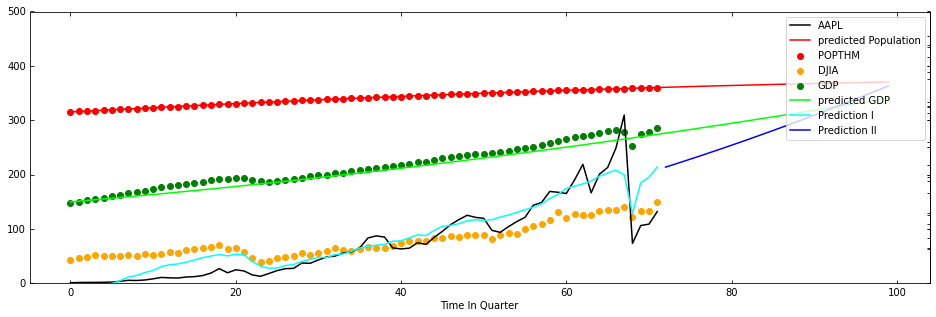

In [12]:
#Plot the prediction to get the predicted value of $AAPL
plt.figure(figsize=(20,5))
host = host_subplot(111,axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

df = drop_final

ax = host.twinx()
ax2 = host.twinx()
ax3 = host.twinx()
ax4 = host.twinx()
ax5 = host.twinx()
ax6 = host.twinx()

host.set_xlabel("Time In Quarter")

ax.set_ylim([0, 230000*2])
ax2.set_ylim([0, 50000*2])
ax3.set_ylim([0, 19250*2])
ax4.set_ylim([0, 20000*2])
ax5.set_ylim([0, 6000*2])
ax6.set_ylim([0, 250*2])
host.set_ylim([0, 250*2])

x=[i for i in range (100)]
y1 = [289896.0941420874 + 761.75474975*x - 2.50907711*x**2 for x in range(100)]
# y2 = [-51447.416078569775 + 1.97386493e+04*x - 6.85960022e+02*x**2 + 8.71871160e+00*x**3 for x in range(80)]
y3 = [11982.045044998747 +103.3851211*x + 0.51536475*x**2 for x in range (100)]
ax.plot(x, y1,c="red", label="predicted Population")
# ax2.plot(x, y2,c="orange", label="predicted DJIA")
ax4.plot(x, y3,c="lime", label="predicted GDP")
# "Population", "GDP"
ax.scatter([i for i in range(72)],drop_final[para[0]],c="red", label="POPTHM")
ax2.scatter([i for i in range(72)],drop_final['DJIA'],c="orange", label="DJIA")
ax3.scatter([i for i in range(72)],drop_final['GDP'],c="green", label="GDP")
#AAPL =  541.5998 - 0.0033*Population + 0.0347 * GDP
host.plot(df["AAPL"], color='black', label="AAPL")
x = [i for i in range(72)]
y = 541.5998 - 0.0033*df["POPTHM"][x] + 0.0347*df["GDP"][x]
ax6.plot(x, y, c="cyan", label="Prediction I")
x = [i for i in range(72,100)]
y = [541.5998 - 0.0033 *y1[x]  + 0.0347*y3[x] for x in range(72,100)]
ax6.plot(x, y, c="blue", label="Prediction II")

host.legend()

plt.show()
